import kplr
client = kplr.API()
koi = client.koi(97.01) # Find the target KOI.
lcs = koi.get_light_curves(short_cadence=False) # Get list of datasets.
f = lcs[0].open() # open the first light-curve dataset
hdu_data = f[1].data
time = hdu_data["time"] # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
flux_err = hdu_data["sap_flux_err"] # get the error in the flux
f.close()

import kplr
client = kplr.API()
koi = client.koi(97.01) # Find the target KOI.
lcs = koi.get_light_curves(short_cadence=False) # Get list of datasets.
f = lcs[0].open() # open the first light-curve dataset
hdu_data = f[1].data
time = hdu_data["time"] # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
flux_err = hdu_data["sap_flux_err"] # get the error in the flux
f.close()

In [342]:
import numpy as np

In [343]:
import matplotlib.pyplot as plt

In [344]:
plt.plot(time,flux)

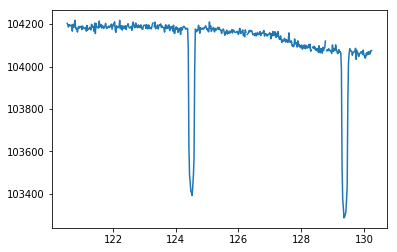

In [345]:
plt.show()

In [346]:
plt.errorbar(time,flux,yerr=flux_err)

<Container object of 3 artists>

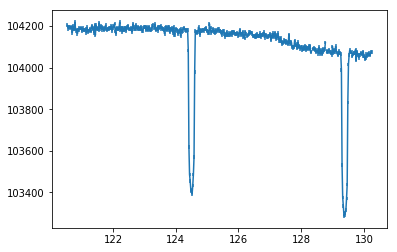

In [347]:
plt.show()

In [348]:
np.where((time>124) & (time<125))

(array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218]),)

In [349]:
plt.errorbar(time[170:218],flux[170:218],yerr=flux_err[170:218])

<Container object of 3 artists>

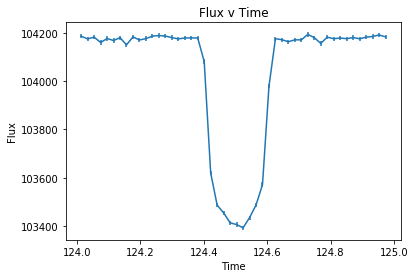

In [350]:
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux v Time")
plt.show()

In [351]:
time[194] #218-170= 48 , 48/2= 24 , 170+24 =194=t0

124.50364398366219

In [352]:
time[170]

124.01321599979565

In [373]:
#problem 2a

G=[] #t-t0
for x in time[170:219]:
    a=x-time[194]
    G.append(a)

In [354]:
G=np.asarray(G)

In [355]:
G 

array([-0.49042798, -0.46999338, -0.44955898, -0.42912448, -0.40868998,
       -0.38825548, -0.36782098, -0.34738648, -0.32695188, -0.30651749,
       -0.28608299, -0.26564849, -0.24521399, -0.22477949, -0.20434499,
       -0.18391039, -0.16347599, -0.14304149, -0.12260699, -0.10217249,
       -0.08173799, -0.0613035 , -0.0408689 , -0.0204345 ,  0.        ,
        0.0204344 ,  0.040869  ,  0.0613035 ,  0.08173789,  0.10217249,
        0.12260699,  0.14304149,  0.16347589,  0.18391048,  0.20434498,
        0.22477938,  0.24521398,  0.26564847,  0.28608287,  0.30651737,
        0.32695197,  0.34738636,  0.36782086,  0.38825536,  0.40868996,
        0.42912435,  0.44955885,  0.46999345,  0.49042784])

In [356]:
Z=[]# t-t0/ ((.5 the width of the transit) #assumig the width of transit is aprox .2
for i in range(len(G)):
    z=G[i]/float(.1)
    Z.append(z)
    

In [357]:
Z

[-4.9042798386653885,
 -4.6999338374735089,
 -4.4955898373882519,
 -4.2912448372953804,
 -4.0868998383666622,
 -3.8825548395107035,
 -3.6782098417461384,
 -3.4738648440543329,
 -3.2695188474463066,
 -3.0651748520176625,
 -2.8608298577455571,
 -2.6564848623820581,
 -2.4521398692741059,
 -2.2477948762389133,
 -2.0434498842951143,
 -1.8391038923437009,
 -1.6347599015716696,
 -1.4304149108647835,
 -1.2260699224134441,
 -1.0217249328707112,
 -0.81737994558352511,
 -0.61303495713218581,
 -0.40868897107429802,
 -0.20434498495887965,
 0.0,
 0.20434398495126516,
 0.4086899686808465,
 0.61303495131141972,
 0.81737893393437844,
 1.0217249164998066,
 1.2260698968020733,
 1.4304148770315805,
 1.6347588573262328,
 1.8391048353078077,
 2.0434498144459212,
 2.2477937911753543,
 2.4521397679927759,
 2.6564847447298234,
 2.8608287192037096,
 3.0651736936852103,
 3.2695196681743255,
 3.4738636414112989,
 3.6782086135644931,
 3.8825535845535342,
 4.0868995554774301,
 4.2912435264588566,
 4.495588495119591

In [358]:
p=float(.148)/float(1.84) # ratio of rp/r* values taken from APJ 2010 713 L140

In [359]:
def Lamb(p,z):
    z=np.absolute(z)


    if z>1+p:
        lam=0

    elif z> np.absolute(1-p) and z<(1+p):
        k_0=np.arccos((p**2+z**2-1)/(2*p*z))
        k_1=np.arccos((1-p**2+z**2)/(2*z))
        lam=(1/np.pi)*(p**2*k_0 + k_1- np.sqrt((4*z**2-(1+z**2-p**2)**2)/float(4)))
        
    elif z<= 1-p:
        lam= p**2

    elif z<= p-1:
        lam= int(1)

    return lam


def kepler(n,z):
    p=float(n)
    F=[]
    x=np.asarray(z)
    for i in x:
        lambda_e=Lamb(p,i)
        Flux_ratio= 1-lambda_e # note that this is a function of p and abs(z)
        F.append(Flux_ratio)
    return(F,x)

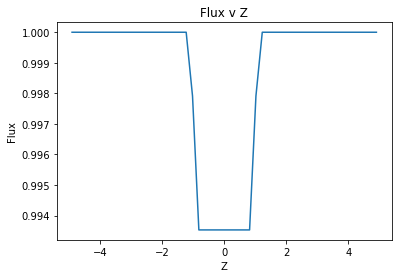

In [360]:
a=kepler(p,Z) # using the Flux equation from HW1 with new values for p and Z
plt.errorbar(a[1],a[0])
plt.xlabel("Z")
plt.ylabel("Flux")
plt.title("Flux v Z")
plt.show()


In [375]:
#problem 2b   using the code from problem set 2 with different def for I(r)

In [361]:
def delta(p,r,z):
    if r>= z+p or r<=z-p:
        d=0
    elif r+z<=p:
        d=1
    else:
        d= 1/np.pi*np.arccos((z**2-p**2+r**2)/(2*z*r))
    return d 


def integral1(b,c,d,e,f):
    p=b
    z=c
    x_n=d
    x_0=e
    N=f
    dx=(x_n-x_0)/N
    F1=[]
    for i in np.arange(x_0,(N-1),dx):
        x_i=x_0+i*dx
        u=(1-x_i**2)**(1/2)
        I_r=1-(1-u**(3/2))
        f_x=I_r*(1-delta(p,x_i,z))*2*x_i
        F1.append(f_x)
    first=sum(F1)*dx
    return first


def integral2(b,c,d,e,f):
    p=b
    z=c
    x_n=d
    x_0=e
    N=f
    dx=(x_n-x_0)/N
    F2=[]
    for i in np.arange(x_0,(N-1),dx):
        x_i=x_0+i*dx
        u=(1-x_i**2)**(1/2)
        I_r=1-(1-u**(3/2))
        f_x=I_r*2*x_i
        F2.append(f_x)
    second=sum(F2)*dx
    return second

def values(x,y): # x is p and y is z
    p=float(x)
    z=float(y)
    x_n=float(1)
    x_0=float(0)
    N=int(10)
    return(p,z,x_n,x_0,N)
                                                                  
        

In [376]:
raf=[] #ratio of the two integrals 
for i in range(len(Z)):
    a1=values(p,np.absolute(Z[i]))
    b1=integral1(a1[0],a1[1],a1[2],a1[3],a1[4])
    b2=integral2(a1[0],a1[1],a1[2],a1[3],a1[4])
    e=b1/b2
    raf.append(e)
    
    


In [365]:
raf

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99191649883037769,
 0.99190443379136206,
 0.99195300963998434,
 0.9918924960378428,
 0.99101123595505614,
 0.9918924959170089,
 0.99195304285195074,
 0.99190443386690585,
 0.99191647985920983,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

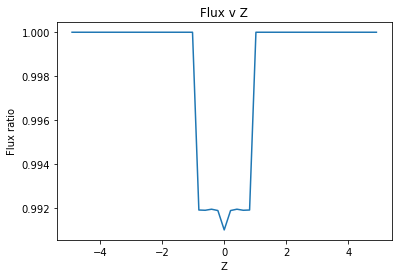

In [370]:
plt.xlabel('Z')
plt.ylabel('Flux ratio')
plt.title('Flux v Z')
plt.plot(Z,raf)
plt.show()

In [371]:
#problem 3

In [377]:
def f(x): # d is the distance in AU , we want to know the value of x such that  (d -.5)=0 
    Ts=x-5780 # T_star
    a=(8.175e-5)
    b=(1.706e-9)
    Ss=1.1014 # S_star
    Sf=(Ss + a*x + b*x**2) # S_eff
    d=(((x/5780)**4)/Sf)**(.5) # AU
    return d

In [378]:
def check():
    rafa=np.arange(4000,5000,.0001)
    for i in rafa[::-1]:
        while abs(i-rafa[0])>1:
            tm=(i+rafa[0])/2
            if np.sign(f(rafa[0])) == np.sign(f(tm)):
                rafa[0]=tm
            else:
                i=tm
            return tm

In [380]:
f(4528.019292551728999) #pure guessing!!!!!

0.5000000000000001

In [381]:
check()

4499.9999510113576

In [382]:
f(4499.9999510113576)  #using value from check

0.49427790487620044

In [383]:
#A way I thought of

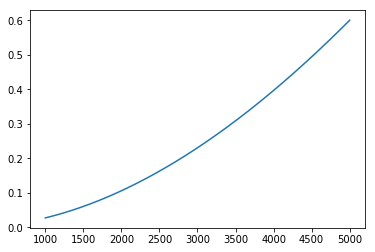

In [293]:
x=np.arange(1000,5000,.01) # guessing a range of possible values
deef=[]
for i in x:
    Ts=float(i)-5780 # T_star
    a=(8.175e-5)
    b=(1.706e-9)
    Ss=1.1014
    Sf=(Ss + a*float(i) + b*float(i)**2)
    d=(((float(i)/5780)**4)/Sf)**(.5)    # we want d to equal .5 so that d-.5=0
    deef.append(d)

plt.plot(x,deef)
plt.show()
    

In [326]:
x=np.arange(4400,4800,.0001)  #looking at this plot you can see d=.5 around 4400-4800
deef=[]   #the smaller the step size the more accurate
for i in x:
    Ts=float(i)-5780 # T_star
    a=(8.175e-5)
    b=(1.706e-9)
    Ss=1.1014
    Sf=(Ss + a*float(i) + b*float(i)**2)
    d=(((float(i)/5780)**4)/Sf)**(.5)
    if (d - .5)>= 0 and (d-.5)<= 0.00000001:
        deef.append(i)
    
    
    

In [327]:
deef

[4528.0193002589467]

In [384]:
f(4528.0193002589467) #closer than check

0.5000000015778028